<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/logistic_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn #relacion lineal 
import torch.optim as optim

import matplotlib.pyplot as plt

# **Regresión Logística**
Preparamos nuestros datos

In [2]:
n= 100
h = n//2 # denota la mitad del dataset (50 pares)
dimension = 2

#generamos un dataset aleatorio 
# Por 3 para despues centrarlo en 3,3 y -3,3 
data= np.random.randn(n, dimension) * 3 

#muestro primeros105 valores de la data como ejemplo
data[:10]

array([[-5.25374874,  0.18702023],
       [-0.92753142, -1.40934153],
       [-1.86625052,  2.23756111],
       [ 1.61898145,  0.08808449],
       [ 3.44336403,  1.34057479],
       [ 2.20798848,  6.50818424],
       [-3.67498673, -2.16647804],
       [-4.07371509,  1.20219182],
       [-0.56398968, -0.80405274],
       [ 3.99297165, -1.70146008]])

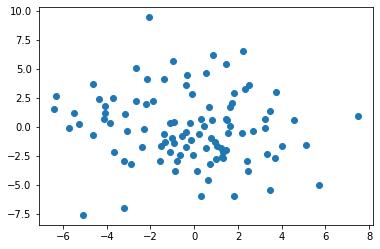

In [3]:
# Graficamos los 100 pares de puntos
plt.scatter(data[:,0], data[:,1])

In [4]:
# Muevo la primer mitad de datos (pares de 1 al 50) centrandolos en -3
data[:h, :] = data[:h, :] - 3 * np.ones((h, dimension))

In [5]:
# Muevo la segunda mitad (pares del 51 al 100) centrandolos en +3
data[h:, :] = data[h:, :] + 3*np.ones((h, dimension))

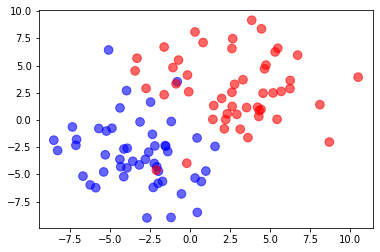

In [6]:
# Graficamos de nuevo
colors = ['blue', 'red']

color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [7]:
target = np.array([0] * h + [1] * h).reshape(n,1)

# Definimos el tensor de entrada (la data)
x = torch.from_numpy(data).float().requires_grad_(True)

# definimos el tensor de salida (0 o 1)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

Definimos el modelo

tensor(0.1647, grad_fn=<BinaryCrossEntropyBackward>)


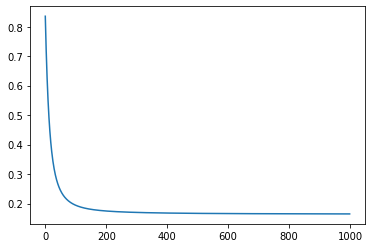

In [8]:
model = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
            )

loss_function = nn.BCELoss() 
#Binary Cross Entropy/log loss

optimizer = optim.SGD(model.parameters(), lr=0.01) 
#Stochastic Gradient Descent

losses = []

iterations = 1000


# definimos el loop de aprendizaje
for i in range(iterations):
  #forwardpass
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  #backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Graficamos 
print(loss)
plt.plot(range(iterations), losses)

In [9]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5 
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] >0.5 
print(colors[prediction])

blue
red


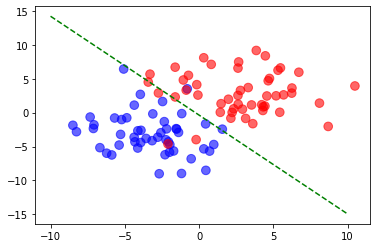

In [10]:
# Graficamos
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# Hasta aqui es la grafica anterior
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

# graficamos una linea recta
x_axis = np.linspace(-10,10, n) 
y_axis = -(w1[0] + x_axis*w0[0][0] / w0[0][1])
plt.plot(x_axis, y_axis, 'g--')

Extras sobre la gráfica

In [11]:
# Valores de X
np.linspace(-10,10, n)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [12]:
# Valores de Y
-(w1[0] + x_axis*w0[0][0] / w0[0][1])

array([ 14.20263263,  13.90841101,  13.61418939,  13.31996777,
        13.02574614,  12.73152452,  12.4373029 ,  12.14308128,
        11.84885966,  11.55463804,  11.26041642,  10.9661948 ,
        10.67197318,  10.37775156,  10.08352994,   9.78930832,
         9.49508669,   9.20086507,   8.90664345,   8.61242183,
         8.31820021,   8.02397859,   7.72975697,   7.43553535,
         7.14131373,   6.84709211,   6.55287049,   6.25864887,
         5.96442725,   5.67020562,   5.375984  ,   5.08176238,
         4.78754076,   4.49331914,   4.19909752,   3.9048759 ,
         3.61065428,   3.31643266,   3.02221104,   2.72798942,
         2.4337678 ,   2.13954617,   1.84532455,   1.55110293,
         1.25688131,   0.96265969,   0.66843807,   0.37421645,
         0.07999483,  -0.21422679,  -0.50844841,  -0.80267003,
        -1.09689165,  -1.39111327,  -1.6853349 ,  -1.97955652,
        -2.27377814,  -2.56799976,  -2.86222138,  -3.156443  ,
        -3.45066462,  -3.74488624,  -4.03910786,  -4.33